<img style="float: right; height: 80px; padding-left: 20px;" src="_static/ENGAGE.png">

# ENGAGE Capacity Building Workshop: the *pyam* package

<br>
<img style="float: left; height: 20px; padding-left: 10px;" src="https://img.shields.io/github/license/danielhuppmann/ENGAGE-pyam-tutorial">
<img style="float: left; height: 20px; padding-left: 10px;" src="https://img.shields.io/badge/python-≥3.8,<3.12-blue?logo=python&logoColor=white">
<img style="float: left; height: 20px; padding-left: 10px;" src="https://img.shields.io/badge/code%20style-black-000000.svg">
<br><br>

Copyright 2022-2023 Daniel Huppmann; this repository is released under the [MIT License](https://github.com/danielhuppmann/ENGAGE-pyam-tutorial/blob/main/LICENSE).

## Overview

This notebook illustrates a number of features of the **pyam** package
presented as part of the *hands-on tutorial sessions*
of the **NAVIGATE-ENGAGE Summer School 2023 on Integrated-Assessment Modeling**.
This workshop was organized as part of the Horizon 2020 project ENGAGE
([link](https://www.engage-climate.org/navigate-engage-summer-school-2023/)).

The slides for the related presentation are available
at https://doi.org/10.5281/zenodo.8112529 (ZENODO).

This tutorial is based on the advanced assignment
of the [Modelling Lab](https://github.com/danielhuppmann/climate-risks-academy-2021),
which was part of the *Climate Risks Academy 2021* organized by
the European University Institute (EUI) Florence School of Banking and Finance
in cooperation with Oliver Wyman.

### Tutorial data source

The scenario data used in this tutorial notebook is taken from
the **NGFS Scenario Ensemble**, Phase 3,  
see Richters et al, 2022 ([link](https://www.ngfs.net/sites/default/files/medias/documents/ngfs_climate_scenarios_for_central_banks_and_supervisors_.pdf.pdf)).

The data was downloaded from the following scenario database:
> **Emissions scenario database of the European Scientific Advisory Board on Climate Change, hosted by IIASA**  
> Release 2.0  
> European Scientific Advisory Board on Climate Change, 2023  
> doi: 	https://doi.org/10.5281/zenodo.7660150  
> url: 	https://data.ece.iiasa.ac.at/eu-climate-advisory-board  

### Read the docs

See the comprehensive documentation of the **pyam** package on
[ReadTheDocs](https://pyam-iamc.readthedocs.io/en/stable/tutorials.html)!


### Installation

You can install the **pyam** package using the following command -
note the subtle naming difference on [pypi.org](https://pypi.org/project/pyam-iamc/).

```
pip install pyam-iamc
```

[Read the docs](https://pyam-iamc.readthedocs.io/en/stable/install.html) for alternative installation options.

In [1]:
import pyam

<IPython.core.display.Javascript object>

## Import and inspect the tutorial data

The tutorial datatset is saved as an Excel spreadsheet in this repository.

In [2]:
df = pyam.IamDataFrame("data/ngfs_data_snapshot.xlsx")

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file data/ngfs_data_snapshot.xlsx


Just calling an **IamDataFrame** prints an overview of all index dimensions and coordinates.

In [3]:
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.0-4.4 (2)
 * scenario : NGFS-Below 2C, NGFS-Current Policies, ... NGFS-Net Zero 2050 (4)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (10)
   unit     : EJ/yr, K, Mt CH4/yr, Mt CO2/yr, US$2010/t CO2 (5)
   year     : 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, ... 2100 (14)
Meta indicators:
   exclude (bool) False (1)

Because there are more scenarios and variables than can be displayed in one line, the summary only shows a few items.

We can easily display all items of an index dimension or a coordinate individually using attributes of the **IamDataFrame**.

In [4]:
df.scenario

['NGFS-Below 2C',
 'NGFS-Current Policies',
 'NGFS-Nationally Determined Contributions (NDCs)',
 'NGFS-Net Zero 2050']

In [5]:
df.variable

['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile',
 'Emissions|CH4',
 'Emissions|CO2',
 'Price|Carbon',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil']

## Filtering and renaming data

The variable *AR6 climate diagnostics|...* looks inconvenient for scenario analysis, so let's look at it in detail...

The [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) method allows to downselect data by any dimenions, where `*` can be used as a wildcard.

And you can use the [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) method to show the timeseries data in wide format.

In [6]:
variable = "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile"
df.filter(variable=variable).timeseries()

2010   
model                       scenario                                        region variable                                           unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563  \
                            NGFS-Current Policies                           World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
                            NGFS-Nationally Determined Contributions (NDCs) World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
                            NGFS-Net Zero 2050                              World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
                            NGFS-Current Policies                           World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
                            NGFS-Nationally Determined Contributions (NDCs) World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   
                            NGFS-Net Zero 2050                              World  AR6 climate diagnostics|Surface Temperature (GS... K     0.975563   

                                                                                                                                                2015   
model                       scenario                                        region variable                                           unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115580  \
                            NGFS-Current Policies                           World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115580   
                            NGFS-Nationally Determined Contributions (NDCs) World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115580   
                            NGFS-Net Zero 2050                              World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115580   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115498   
                            NGFS-Current Policies                           World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115498   
                            NGFS-Nationally Determined Contributions (NDCs) World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115498   
                            NGFS-Net Zero 2050                              World  AR6 climate diagnostics|Surface Temperature (GS... K     1.115498   

                                                                                                                                                2020   
model                       scenario                                        region variable                                           unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     1.236552  \
                            NGFS-Current Policies                           World  AR6 climate diagnostics|Surface Temperature (GS... K     1.234032   
                            NGFS-Nationally Determined Contributions (NDCs) World  AR6 climate diagnostics|Surface Temperature (GS... K     1.234537   
                            NGFS-Net Zero 2050                              World  AR6 climate diagnostics|Surface Temperature (GS... K     1.237095   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  AR6 climate diagnostics|Surface Temperature (GS... K     1.236383   
                            NGFS-Curre

We can easily rename index dimensions for easier processing and analysis.

In [7]:
df.rename(
    variable={variable: "Temperature"},
    unit={"K": "°C"},
    inplace=True
)

In [8]:
df.filter(variable="Temperature").timeseries()

2010   
model                       scenario                                        region variable    unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Temperature °C    0.975563  \
                            NGFS-Current Policies                           World  Temperature °C    0.975563   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    0.975563   
                            NGFS-Net Zero 2050                              World  Temperature °C    0.975563   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Temperature °C    0.975563   
                            NGFS-Current Policies                           World  Temperature °C    0.975563   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    0.975563   
                            NGFS-Net Zero 2050                              World  Temperature °C    0.975563   

                                                                                                         2015   
model                       scenario                                        region variable    unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Temperature °C    1.115580  \
                            NGFS-Current Policies                           World  Temperature °C    1.115580   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    1.115580   
                            NGFS-Net Zero 2050                              World  Temperature °C    1.115580   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Temperature °C    1.115498   
                            NGFS-Current Policies                           World  Temperature °C    1.115498   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    1.115498   
                            NGFS-Net Zero 2050                              World  Temperature °C    1.115498   

                                                                                                         2020   
model                       scenario                                        region variable    unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Temperature °C    1.236552  \
                            NGFS-Current Policies                           World  Temperature °C    1.234032   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    1.234537   
                            NGFS-Net Zero 2050                              World  Temperature °C    1.237095   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Temperature °C    1.236383   
                            NGFS-Current Policies                           World  Temperature °C    1.235106   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    1.235971   
                            NGFS-Net Zero 2050                              World  Temperature °C    1.237098   

                                                                                                         2025   
model                       scenario                                        region variable    unit             
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Temperature °C    1.422769  \
                            NGFS-Current Policies                           World  Temperature °C    1.373457   
                            NGFS-Nationally Determined Contributions (NDCs) World  Temperature °C    1.383378   
                            NGFS-Net Zero 2050                              World  Temperature °C    1.427013   
REMIND-MAgPIE 3.0-4.4       NGFS-B

## A few simple plots

As a first step to get an idea of the scenario data, let's draw some [plots](https://pyam-iamc.readthedocs.io/en/stable/api/plotting.html).

Why not start with the temperature?

<Axes: title={'center': 'region: World - variable: Temperature'}, xlabel='Year', ylabel='°C'>

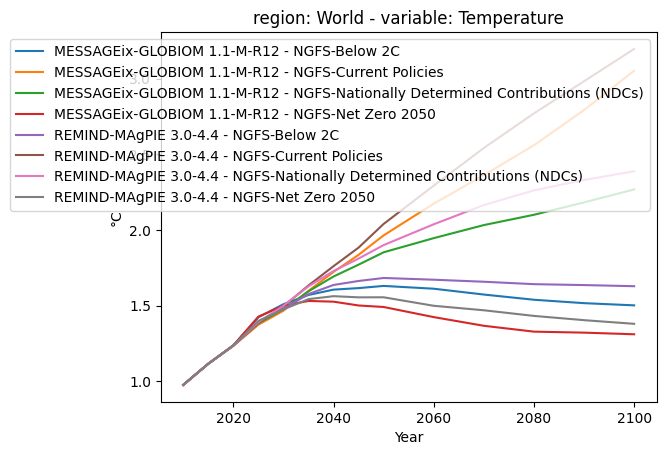

In [9]:
df.filter(variable="Temperature").plot()

Let's move the legend and apply some styling by model and scenario...

<Axes: title={'center': 'region: World - variable: Temperature'}, xlabel='Year', ylabel='°C'>

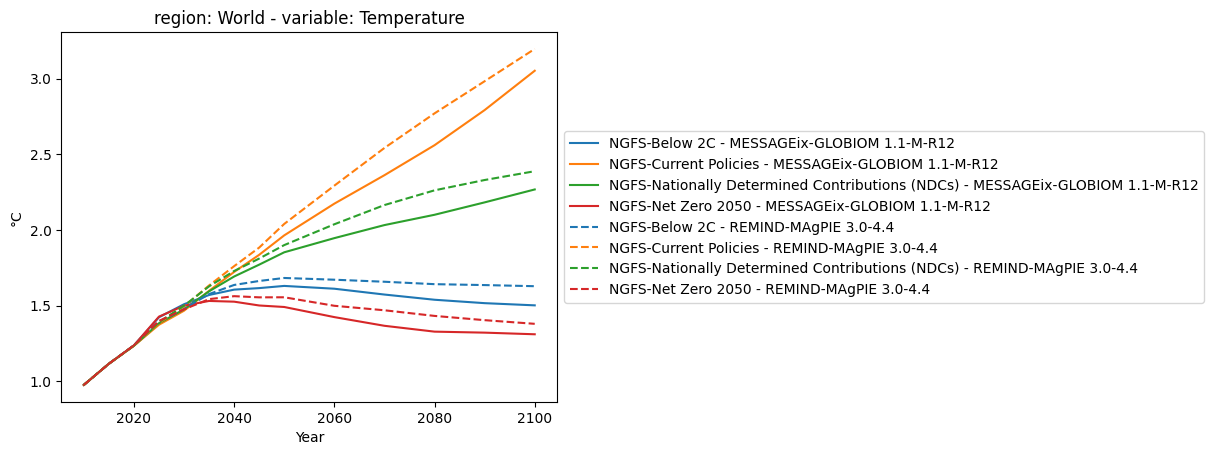

In [10]:
df.filter(variable="Temperature").plot(legend=dict(loc="outside right"), color="scenario", linestyle="model")

## Unit conversion

Working with different units is a constant headache (and source of errors) when handling energy systems data.

To simplify such tasks, **pyam** incorporates the [**iam-units**](https://github.com/iamconsortium/units) package,
a community resource for units commonly used in energy-systems modelling, integrated assessment and climate research.

### Conversion using SI units

The **iam-units** package natively includes all SI units
by building on the [**pint**](https://pint.readthedocs.io) package.

In [11]:
df_coal = df.filter(
    model="MESSAGEix-GLOBIOM 1.1-M-R12",
    scenario="NGFS-Current Policies",
    variable="Primary Energy|Coal",
)
df_coal.timeseries()

,,,,,2010,2015,2020,2025,2030,2035,2040,2045,2050,2060,2070,2080,2090,2100
model,scenario,region,variable,unit,,,,,,,,,,,,,,
MESSAGEix-GLOBIOM 1.1-M-R12,NGFS-Current Policies,World,Primary Energy|Coal,EJ/yr,153.552995,153.020532,156.253495,147.29581,145.551154,136.648935,138.065263,144.186748,154.519797,176.051253,190.081394,215.033055,245.012833,259.560251


In [12]:
df_coal.convert_unit("EJ/yr", "PWh/yr").timeseries()

,,,,,2010,2015,2020,2025,2030,2035,2040,2045,2050,2060,2070,2080,2090,2100
model,scenario,region,variable,unit,,,,,,,,,,,,,,
MESSAGEix-GLOBIOM 1.1-M-R12,NGFS-Current Policies,World,Primary Energy|Coal,PWh/yr,42.65361,42.505703,43.403749,40.915503,40.430876,37.958037,38.351462,40.051874,42.922166,48.903126,52.800387,59.731404,68.05912,72.10007


### Conversion of greenhouse gase emissions using Global Warming Potentials

The **iam-units** package also includes a module to convert different greenhouse-gas emissions
by alternative **global-warming-potential (GWP)** metrics.

In [13]:
ch4_df = df.filter(model="MESSAGEix-GLOBIOM 1.1-M-R12", variable="Emissions|CH4")
ch4_df.timeseries()

2010   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  333.979307  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CH4/yr  333.979307   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CH4/yr  333.979307   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CH4/yr  333.979307   

                                                                                                                  2015   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  342.423178  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CH4/yr  342.423178   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CH4/yr  342.423178   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CH4/yr  342.423178   

                                                                                                                  2020   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  319.436079  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CH4/yr  319.436079   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CH4/yr  319.436079   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CH4/yr  319.436079   

                                                                                                                  2025   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  233.088788  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CH4/yr  325.889373   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CH4/yr  311.376665   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CH4/yr  213.122198   

                                                                                                                  2030   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  205.430174  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CH4/yr  327.795260   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CH4/yr  304.689448   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CH4/yr  182.532839   

                                                                                                                  2035   
model                       scenario                                        region variable      unit                    
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CH4/yr  186.216065  \
                            NGFS-Current Policies                           World  

Comparing the climate effect of different greenhouse gases requires a well-defined metric,
usually the "Global Warming Potential" (GWP) assuming a period of assessment (20 or 100 years)
as assessed by the IPCC (e.g., AR6).

In [14]:
ch4_df.convert_unit("Mt CH4/yr", "Mt CO2e/yr", context="AR6GWP100").timeseries()

2010   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  9318.022652  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  9318.022652   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  9318.022652   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  9318.022652   

                                                                                                                    2015   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  9553.606676  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  9553.606676   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  9553.606676   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  9553.606676   

                                                                                                                    2020   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  8912.266612  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  8912.266612   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  8912.266612   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  8912.266612   

                                                                                                                    2025   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  6503.177196  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  9092.313498   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  8687.408953   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  5946.109328   

                                                                                                                    2030   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  5731.501843  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  9145.487760   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  8500.835591   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  5092.666206   

                                                                                                                    2035   
model                       scenario                                        region variable      unit                      
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  5195.428227  \
                   

In [15]:
ch4_df.convert_unit("Mt CH4/yr", "Mt CO2e/yr", context="AR6GWP20").timeseries()

2010   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  27119.119689  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  27119.119689   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  27119.119689   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  27119.119689   

                                                                                                                     2015   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  27804.762081  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  27804.762081   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  27804.762081   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  27804.762081   

                                                                                                                     2020   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  25938.209637  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  25938.209637   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  25938.209637   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  25938.209637   

                                                                                                                     2025   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  18926.809618  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  26462.217063   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  25283.785196   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  17305.522490   

                                                                                                                     2030   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  16680.930096  \
                            NGFS-Current Policies                           World  Emissions|CH4 Mt CO2e/yr  26616.975130   
                            NGFS-Nationally Determined Contributions (NDCs) World  Emissions|CH4 Mt CO2e/yr  24740.783154   
                            NGFS-Net Zero 2050                              World  Emissions|CH4 Mt CO2e/yr  14821.666522   

                                                                                                                     2035   
model                       scenario                                        region variable      unit                       
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Emissions|CH4 Mt CO2e/yr  151

See [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/unit_conversion.html#4.-Use-contexts-to-specify-conversion-metrics) for more information on unit conversion!

## Computing aggregates

If you look at the list of variables in the scenario data, you'll see that we initially only have sub-categories of *Primary Energy*.

However, **pyam** offers a number of useful functions to aggregate (or downscale) by sectors or regions.

### Aggregation by sector

By default, the [aggregate()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.aggregate) method
takes all components of the given variable, in this case `Primary Energy|*`.<br />
It returns a new **IamDataFrame** - and the cell displays the summary. You will see that the object has exactly one variable now.

In [16]:
df.aggregate("Primary Energy")

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.0-4.4 (2)
 * scenario : NGFS-Below 2C, NGFS-Current Policies, ... NGFS-Net Zero 2050 (4)
Timeseries data coordinates:
   region   : World (1)
   variable : Primary Energy (1)
   unit     : EJ/yr (1)
   year     : 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, ... 2100 (14)
Meta indicators:
   exclude (bool) False (1)

<Axes: title={'center': 'region: World - variable: Primary Energy'}, xlabel='Year', ylabel='EJ/yr'>

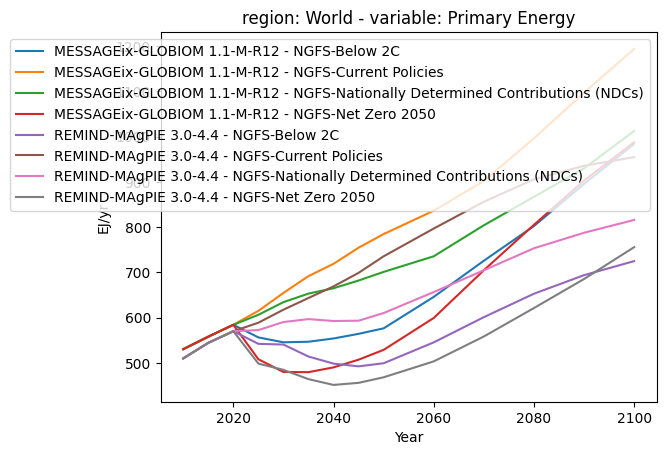

In [17]:
df.aggregate("Primary Energy").plot()

In [18]:
df.aggregate("Primary Energy").timeseries()

2010   
model                       scenario                                        region variable       unit                
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Primary Energy EJ/yr  530.340479  \
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  530.340479   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  530.340479   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  530.340479   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Primary Energy EJ/yr  509.951300   
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  509.951300   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  509.951300   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  509.951300   

                                                                                                               2015   
model                       scenario                                        region variable       unit                
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Primary Energy EJ/yr  558.028925  \
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  558.028925   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  558.028925   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  558.028925   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Primary Energy EJ/yr  544.342100   
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  544.342100   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  544.342100   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  544.342100   

                                                                                                               2020   
model                       scenario                                        region variable       unit                
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Primary Energy EJ/yr  584.226679  \
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  584.226679   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  584.226679   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  584.226679   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                   World  Primary Energy EJ/yr  570.018300   
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  570.018300   
                            NGFS-Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  570.018300   
                            NGFS-Net Zero 2050                              World  Primary Energy EJ/yr  570.018300   

                                                                                                               2025   
model                       scenario                                        region variable       unit                
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                   World  Primary Energy EJ/yr  556.372278  \
                            NGFS-Current Policies                           World  Primary Energy EJ/yr  615.115739   
                            NGFS-Nationally Determined Contrib

It is often convenient to directly append computed timeseries data to the original object.
For that, you can use the `append=True` keyword argument.

In [19]:
df.aggregate("Primary Energy", append=True)

When displaying the variables of the **IamDataFrame** again, there is now an additional variable *Primary Energy*.

In [20]:
df.variable

['Emissions|CH4',
 'Emissions|CO2',
 'Price|Carbon',
 'Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Temperature']

### Aggregation by region

In the interest of time, the features for regional aggregation and downscaling are not shown in this notebook.

Take a look at [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/aggregating_downscaling_consistency.html)
for more information!

## Categorization of scenarios by their temperature outcome

We often want to categorize scenarios by some metrics or indicators.
As an example, let us divide scenarios into groups "above 2C" and "below 2C".

First, we assign all scenarios to the "above 2C" group,
and then use the [categorize()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.categorize) method
to re-assign all scenarios that satisfy certain criteria.

In [21]:
df.set_meta(meta="above 2C", name="warming-category")

In [22]:
df.categorize(
    "warming-category", "below 2C",
    criteria={"Temperature": {"up": 2.0}},
)

pyam.core - INFO: 4 scenarios categorized as `warming-category: below 2C`


We can inspect the assignment of categories via the `meta` attribute.

In [23]:
df.meta

exclude   
model                       scenario                                                   
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                      False  \
                            NGFS-Current Policies                              False   
                            NGFS-Nationally Determined Contributions (NDCs)    False   
                            NGFS-Net Zero 2050                                 False   
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                      False   
                            NGFS-Current Policies                              False   
                            NGFS-Nationally Determined Contributions (NDCs)    False   
                            NGFS-Net Zero 2050                                 False   

                                                                            warming-category  
model                       scenario                                                          
MESSAGEix-GLOBIOM 1.1-M-R12 NGFS-Below 2C                                           below 2C  
                            NGFS-Current Policies                                   above 2C  
                            NGFS-Nationally Determined Contributions (NDCs)         above 2C  
                            NGFS-Net Zero 2050                                      below 2C  
REMIND-MAgPIE 3.0-4.4       NGFS-Below 2C                                           below 2C  
                            NGFS-Current Policies                                   above 2C  
                            NGFS-Nationally Determined Contributions (NDCs)         above 2C  
                            NGFS-Net Zero 2050                                      below 2C

We can now use this categorization to assign styles for the plots of other variables.

<Axes: title={'center': 'region: World - variable: Primary Energy|Gas'}, xlabel='Year', ylabel='EJ/yr'>

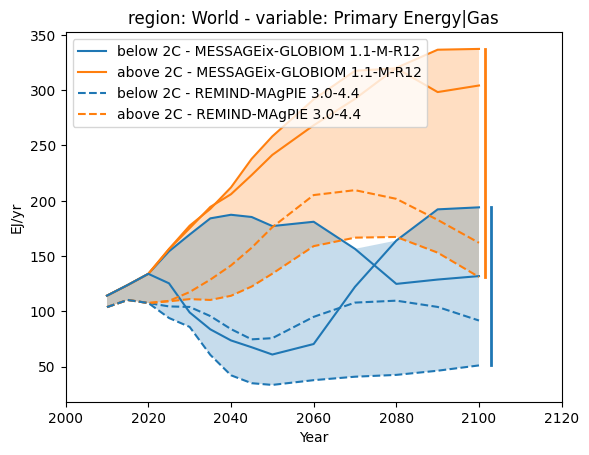

In [24]:
(
    df.filter(variable="Primary Energy|Gas")
    .plot(color="warming-category", linestyle="model", fill_between=True, final_ranges=True)
)

Of course, **pyam** also supports a lot of other plot types and styles -
check out the [plotting gallery](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html)!

## Algebraic operations

**pyam** can also perform algebraic directly on the timeseries data.

All algebraic-operations functions (
[add()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.add),
[subtract()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.subtract),
[multiply()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.multiply),
[divide()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.divide)
) follow the syntax:

```
df.<method>(a, b, c) => a <op> b = c
```

If possible, **pyam** will try to keep the unit consistent during the operation.  
This feature is supported by the **pint** and the **iam-units** packages,
see [here](https://github.com/iamconsortium/units).

## Computing the amount of primary energy that is not coal

First, we subtract coal from total primary energy and draw a simple plot.  
For this section, we will use a downselected version of the scenario data that only has global values.

<Axes: title={'center': 'region: World - variable: diff'}, xlabel='Year', ylabel='EJ/yr'>

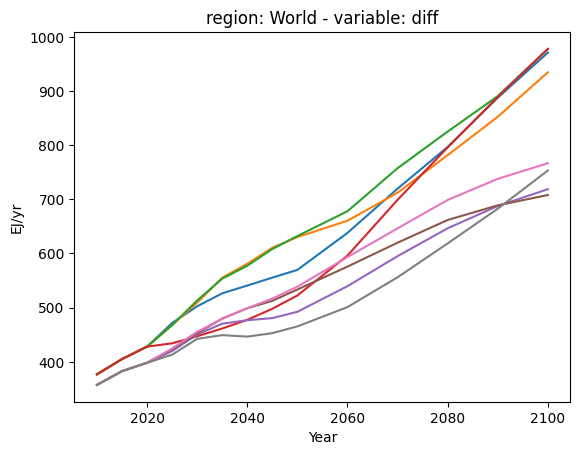

In [25]:
df.subtract("Primary Energy", "Primary Energy|Coal", "diff").plot(legend=False)

### Computing coal as a share of primary energy

Next, we can also compute the share of coal relative to total primary energy, and again draw the plot.

<Axes: title={'center': 'region: World - variable: Share of coal'}, xlabel='Year', ylabel='Value'>

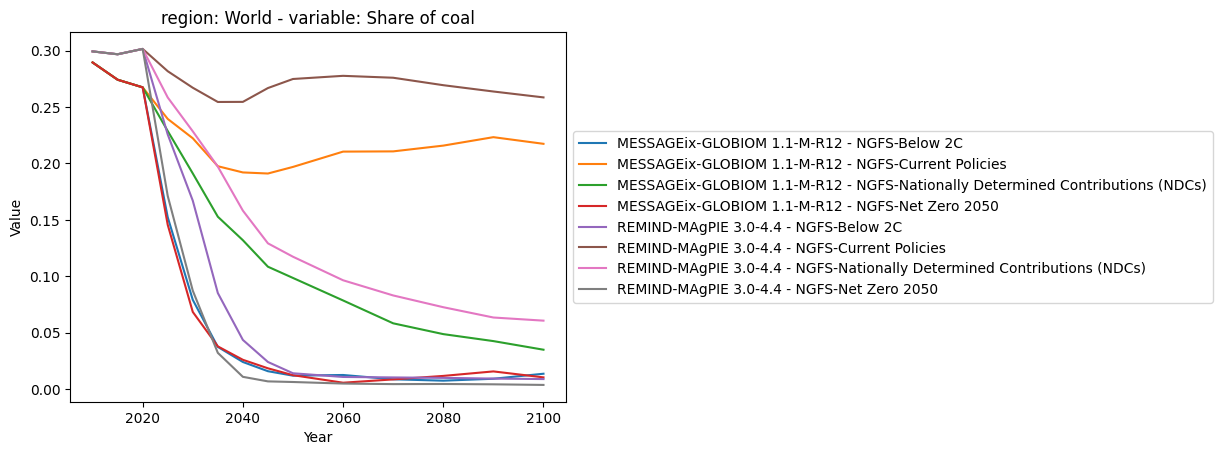

In [26]:
df.divide("Primary Energy|Coal", "Primary Energy", "Share of coal").plot(legend=dict(loc="outside right"))

Note that **pyam** has automatically changed the unit on the y-axis.
Dividing `EJ/yr` by `EJ/yr` yiels in a dimensionless value.

### Compute ratio of energy sources between different scenarios

So far, we used the algebraic operations on the (default) *variable* axis.
But **pyam** also supports these operations on any other axis of the timeseries data!

Now, we compute the relative indicator between the *Net Zero 2050* and the *Current Policies* scenarios,
and again plot the resulting timeseries data.  
For simplicity, we only perform this computation on primary-energy values (including the sub-categories)
of the *REMIND* model.

In [27]:
df_pe = df.filter(model="REMIND-MAgPIE 3.0-4.4", variable="Primary Energy*")

<Axes: title={'center': 'model: REMIND-MAgPIE 3.0-4.4 - scenario: diff - region: World'}, xlabel='Year', ylabel='Value'>

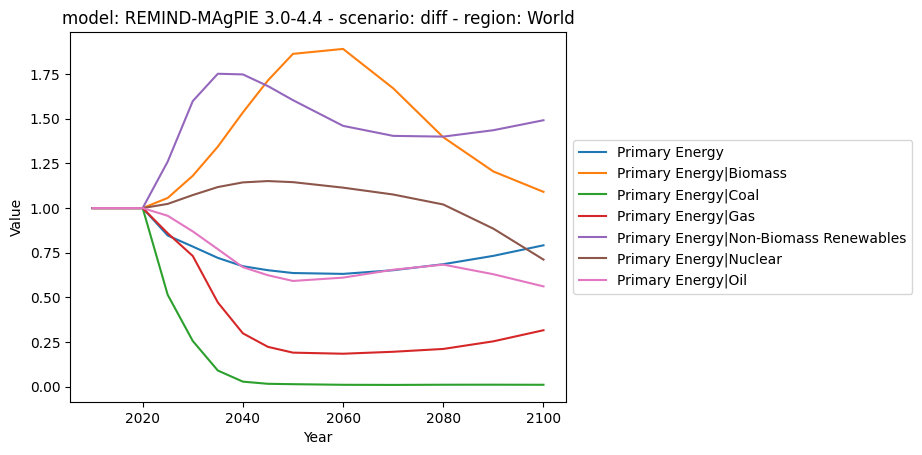

In [28]:
(
    df_pe.divide("NGFS-Net Zero 2050", "NGFS-Current Policies", "diff", axis="scenario")
    .plot(legend=dict(loc="outside right"))
)

In [29]:
import matplotlib.pyplot as plt

As a final illustration, this tutorials shows how to use **matplotlib** and **pyam** to create several plots next to each other.

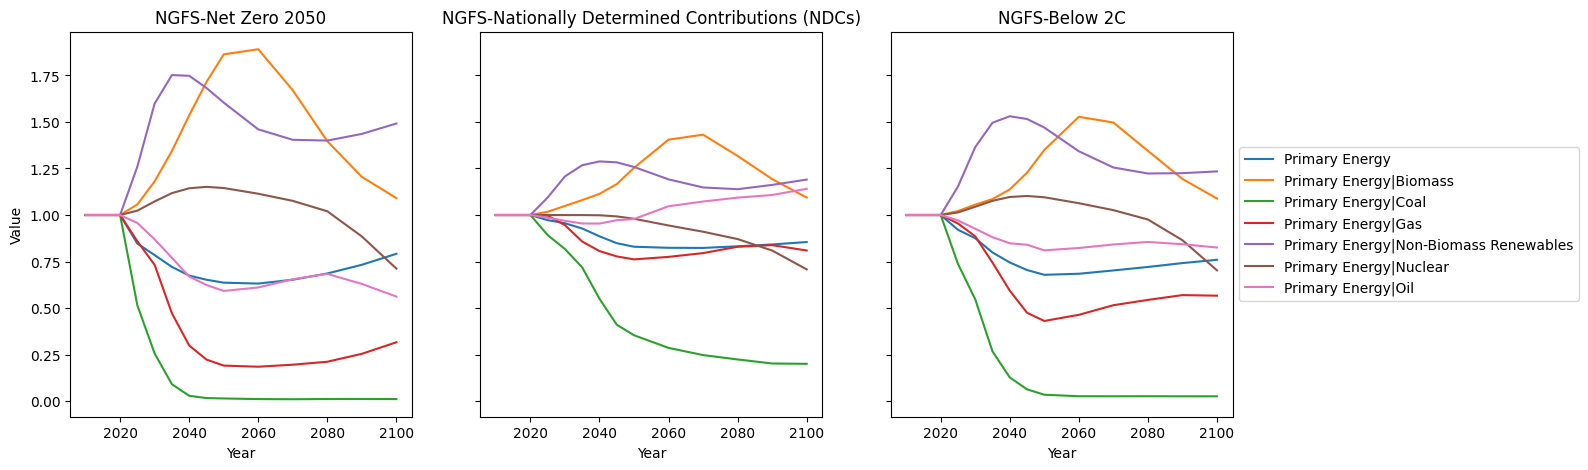

In [30]:
baseline = "NGFS-Current Policies"
scenario = set(df.scenario) - set([baseline])

# We first create a matplotlib figure with several "axes" objects (i.e., individual plots)
fig, ax = plt.subplots(1, len(scenario), figsize=(15, 5), sharey=True)

# Then, we iterate over the axes, plotting the results for each scenario as we go along
for i, s in enumerate(scenario):
    (
        df_pe.divide(s, baseline, "diff", axis="scenario")
        .plot(ax=ax[i], legend=dict(loc="outside right") if i==len(scenario) - 1 else False)
    )

    # We can also modify the axes objects directly to produce a better figure
    ax[i].set_title(s)

## Query any IIASA Scenario Explorer database

For this tutorial, the data is included as an Excel spreadsheet for simplicity.

However, a lot of scenario data is available via the **IIASA Scenario Explorer** infrastructure,  
for example the scenario ensemble supporting the **IPCC Sixth Assessment Report (AR6)** 
([link](http://data.ece.iiasa.ac.at/ar6/#/login)).

You can easily query scenario data hosted by IIASA directly from a Python environment
(or R, see [here](https://pyam-iamc.readthedocs.io/en/stable/R_tutorials/pyam_R_tutorial.html))
using the **pyam** package.

See this [tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/iiasa_dbs.html)
for more information!

<div class="alert alert-info">

**Curious about more pyam features?** Check out the all the pyam tutorials on our [ReadTheDocs page](https://pyam-iamc.readthedocs.io/en/stable/tutorials.html)!

</div>